# **Name - Aditya Naresh Burde**
# **Assignment Title - Linear Regression Order Delivery Time Prediction**

# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [4]:
# Importing the file Raw_data_1.csv
Raw_data = pd.read_csv("porter_data_1.csv")
Raw_data

market_id           created_at actual_delivery_time  \
0             1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1             2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2             2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3             1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4             1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   
...           ...                  ...                  ...   
175772        1.0  2015-02-17 00:19:41  2015-02-17 01:02:41   
175773        1.0  2015-02-13 00:01:59  2015-02-13 01:03:59   
175774        1.0  2015-01-24 04:46:08  2015-01-24 05:32:08   
175775        1.0  2015-02-01 18:18:15  2015-02-01 19:03:15   
175776        1.0  2015-02-08 19:24:33  2015-02-08 20:01:33   

        store_primary_category  order_protocol  total_items  subtotal  \
0                            4             1.0            4      3441   
1                           46             2.0            1      1900   
2                           36             3.0            4      4771   
3                           38             1.0            1      1525   
4                           38             1.0            2      3620   
...                        ...             ...          ...       ...   
175772                      28             4.0            3      1389   
175773                      28             4.0            6      3010   
175774                      28             4.0            5      1836   
175775                      58             1.0            1      1175   
175776                      58             1.0            4      2605   

        num_distinct_items  min_item_price  max_item_price  \
0                        4             557            1239   
1                        1            1400            1400   
2                        3             820            1604   
3                        1            1525            1525   
4                        2            1425            2195   
...                    ...             ...             ...   
175772                   3             345             649   
175773                   4             405             825   
175774                   3             300             399   
175775                   1             535             535   
175776                   4             425             750   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                        33.0                14.0                      21.0   
1                         1.0                 2.0                       2.0   
2                         8.0                 6.0                      18.0   
3                         5.0                 6.0                       8.0   
4                         5.0                 5.0                       7.0   
...                       ...                 ...                       ...   
175772                   17.0                17.0                      23.0   
175773                   12.0                11.0                      14.0   
175774                   39.0                41.0                      40.0   
175775                    7.0                 7.0                      12.0   
175776                   20.0                20.0                      23.0   

        distance  
0          34.44  
1          27.60  
2          11.56  
3          31.80  
4           8.20  
...          ...  
175772     13.24  
175773     36.60  
175774     31.80  
175775     15.36  
175776      5.36  

[175777 rows x 14 columns]

In [5]:
Raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [6]:
Raw_data.describe()

market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924      560.828571   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1412.000000            1.000000      299.000000      799.000000   
50%      2224.000000            2.000000      595.000000     1095.000000   
75%      3410.000000            3.000000      942.000000     1395.000000   
max     26800.000000           20.000000    14700.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          175777.000000       175777.000000             175777.000000   
mean               44.918664           41.861381                 58.230115   
std                34.544724           32.168505                 52.731043   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   

            distance  
count  175777.000000  
mean       21.843090  
std         8.748712  
min         0.000000  
25%        15.360000  
50%        21.760000  
75%        28.120000  
max        83.520000

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [7]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
Raw_data['created_at'] = pd.to_datetime(Raw_data['created_at'])
Raw_data['actual_delivery_time'] = pd.to_datetime(Raw_data['actual_delivery_time'])

Raw_data.dtypes[['created_at', 'actual_delivery_time']], Raw_data[['created_at', 'actual_delivery_time']].head()

(created_at              datetime64[ns]
 actual_delivery_time    datetime64[ns]
 dtype: object,
            created_at actual_delivery_time
 0 2015-02-06 22:24:17  2015-02-06 23:11:17
 1 2015-02-10 21:49:25  2015-02-10 22:33:25
 2 2015-02-16 00:11:35  2015-02-16 01:06:35
 3 2015-02-12 03:36:46  2015-02-12 04:35:46
 4 2015-01-27 02:12:36  2015-01-27 02:58:36)

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [8]:
# Convert categorical features to category type
Raw_data['market_id'] = Raw_data['market_id'].astype('category')
Raw_data['store_primary_category'] = Raw_data['store_primary_category'].astype('category')
Raw_data['order_protocol'] = Raw_data['order_protocol'].astype('category')
print(Raw_data.dtypes)

market_id                         category
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category            category
order_protocol                    category
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [9]:
# Calculate time taken in minutes
Raw_data['delivery_time_minutes'] = (Raw_data['actual_delivery_time'] - Raw_data['created_at']).dt.total_seconds() / 60
print(Raw_data[['created_at', 'actual_delivery_time', 'delivery_time_minutes']])

                created_at actual_delivery_time  delivery_time_minutes
0      2015-02-06 22:24:17  2015-02-06 23:11:17                   47.0
1      2015-02-10 21:49:25  2015-02-10 22:33:25                   44.0
2      2015-02-16 00:11:35  2015-02-16 01:06:35                   55.0
3      2015-02-12 03:36:46  2015-02-12 04:35:46                   59.0
4      2015-01-27 02:12:36  2015-01-27 02:58:36                   46.0
...                    ...                  ...                    ...
175772 2015-02-17 00:19:41  2015-02-17 01:02:41                   43.0
175773 2015-02-13 00:01:59  2015-02-13 01:03:59                   62.0
175774 2015-01-24 04:46:08  2015-01-24 05:32:08                   46.0
175775 2015-02-01 18:18:15  2015-02-01 19:03:15                   45.0
175776 2015-02-08 19:24:33  2015-02-08 20:01:33                   37.0

[175777 rows x 3 columns]


In [10]:
Raw_data.describe()

created_at           actual_delivery_time  \
count                         175777                         175777   
mean   2015-02-04 19:57:50.009631744  2015-02-04 20:44:02.190406144   
min              2015-01-21 15:22:03            2015-01-21 16:07:03   
25%              2015-01-29 01:31:19            2015-01-29 02:16:30   
50%              2015-02-05 02:41:26            2015-02-05 03:34:33   
75%              2015-02-12 01:04:32            2015-02-12 01:48:24   
max              2015-02-18 06:00:44            2015-02-18 06:51:10   
std                              NaN                            NaN   

         total_items       subtotal  num_distinct_items  min_item_price  \
count  175777.000000  175777.000000       175777.000000   175777.000000   
mean        3.204976    2697.111147            2.675060      684.965433   
min         1.000000       0.000000            1.000000      -86.000000   
25%         2.000000    1412.000000            1.000000      299.000000   
50%         3.000000    2224.000000            2.000000      595.000000   
75%         4.000000    3410.000000            3.000000      942.000000   
max       411.000000   26800.000000           20.000000    14700.000000   
std         2.674055    1828.554893            1.625681      519.882924   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
count   175777.000000          175777.000000       175777.000000   
mean      1160.158616              44.918664           41.861381   
min          0.000000              -4.000000           -5.000000   
25%        799.000000              17.000000           15.000000   
50%       1095.000000              37.000000           35.000000   
75%       1395.000000              66.000000           63.000000   
max      14700.000000             171.000000          154.000000   
std        560.828571              34.544724           32.168505   

       total_outstanding_orders       distance  delivery_time_minutes  
count             175777.000000  175777.000000          175777.000000  
mean                  58.230115      21.843090              46.203013  
min                   -6.000000       0.000000              32.000000  
25%                   17.000000      15.360000              39.000000  
50%                   41.000000      21.760000              45.000000  
75%                   85.000000      28.120000              52.000000  
max                  285.000000      83.520000             110.000000  
std                   52.731043       8.748712               9.327424

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [11]:
# # Extract the hour and day of week from the 'created_at' timestamp
Raw_data['order_hour'] = Raw_data['created_at'].dt.hour
Raw_data['order_day_of_week'] = Raw_data['created_at'].dt.dayofweek
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
Raw_data['order_day_name'] = Raw_data['order_day_of_week'].map(days)

# Create a categorical feature 'isWeekend'
Raw_data['isWeekend'] = Raw_data['order_day_of_week'].isin([5, 6])
print(Raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [12]:
# Drop unnecessary columns
Raw_data.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [13]:
Raw_data.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  \
0                14.0                      21.0     34.44   
1                 2.0                       2.0     27.60   
2                 6.0                      18.0     11.56   
3                 6.0                       8.0     31.80   
4                 5.0                       7.0      8.20   

   delivery_time_minutes  order_hour  order_day_of_week order_day_name  \
0                   47.0          22                  4         Friday   
1                   44.0          21                  1        Tuesday   
2                   55.0           0                  0         Monday   
3                   59.0           3                  3       Thursday   
4                   46.0           2                  1        Tuesday   

   isWeekend  
0      False  
1      False  
2      False  
3      False  
4      False

In [14]:
# Define target variable (y) and features (X)
# Target variable(y)
y = Raw_data.pop('delivery_time_minutes')

# features (X)
X = Raw_data

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (140621, 16)
X_test: (35156, 16)
y_train: (140621,)
y_test: (35156,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [16]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_column = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
categorical_columns = ['market_id', 'order_protocol', 'order_hour', 'order_day_of_week', 'isWeekend']

print('Numerical columns: ', numerical_column)
print('Categorical columns: ', categorical_columns)

Numerical columns:  ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
Categorical columns:  ['market_id', 'order_protocol', 'order_hour', 'order_day_of_week', 'isWeekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

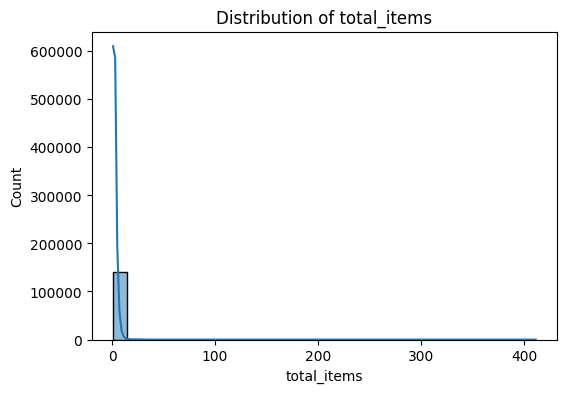

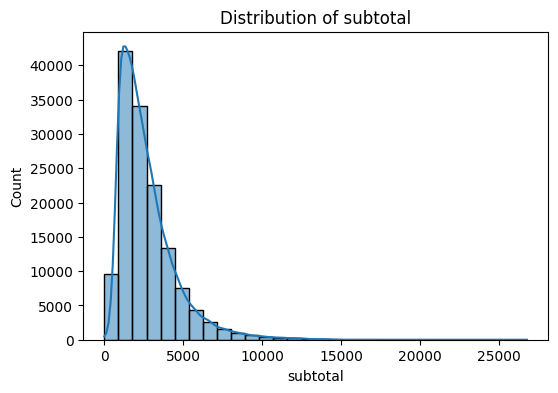

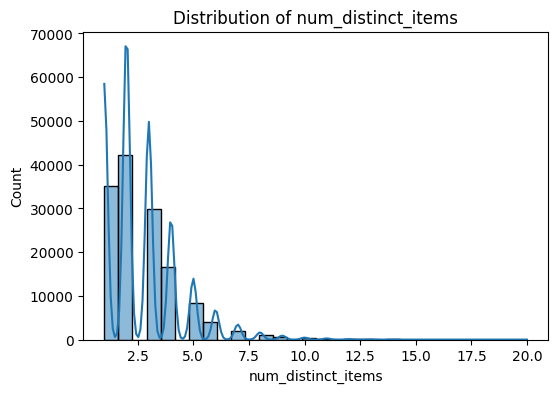

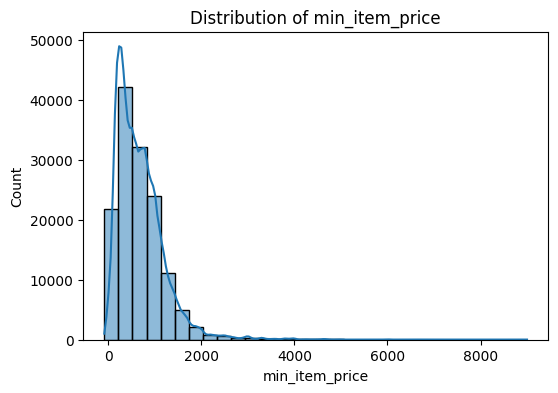

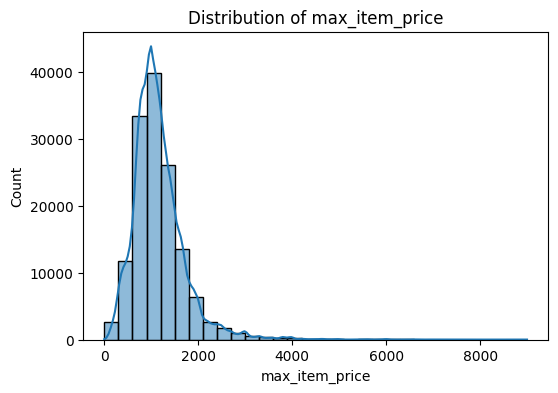

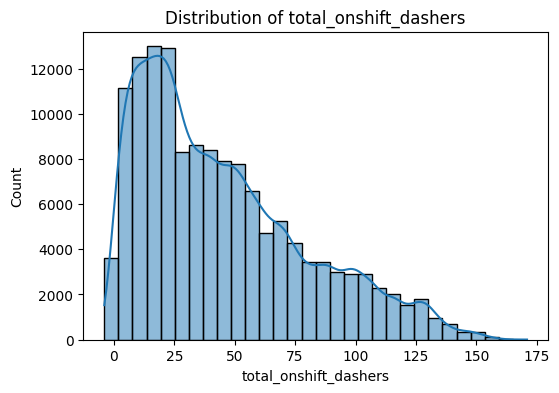

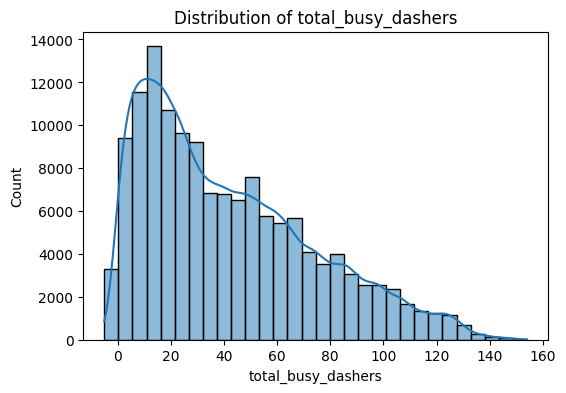

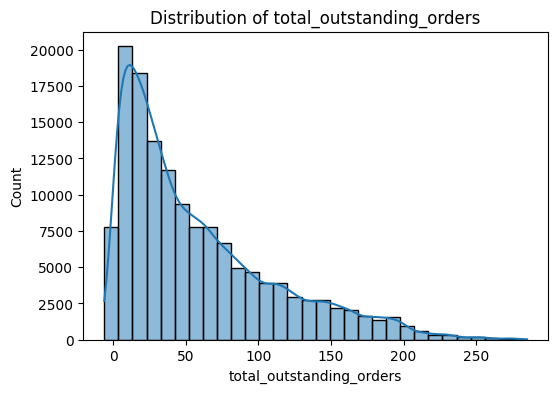

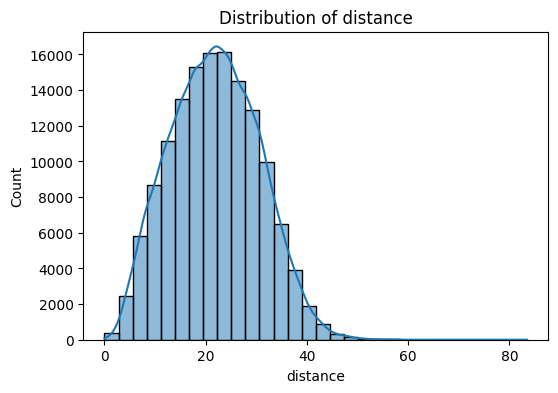

In [17]:
# Plot distributions for all numerical columns
for col in numerical_column:
    plt.figure(figsize=(6,4))
    sns.histplot(X_train[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

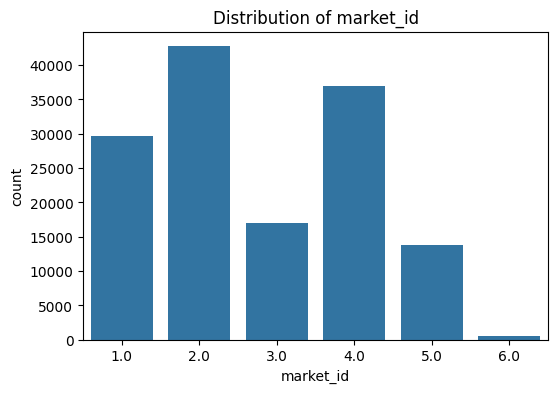

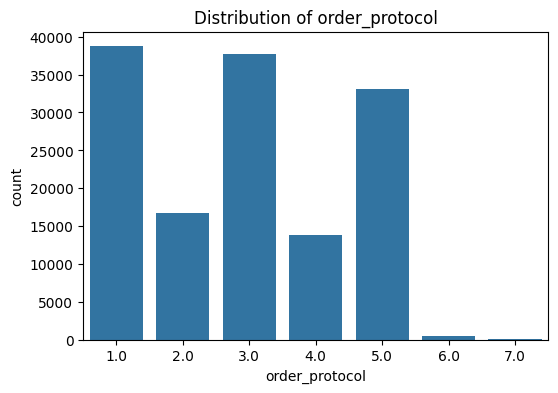

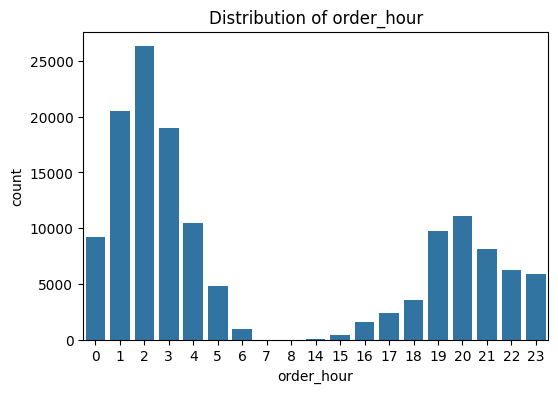

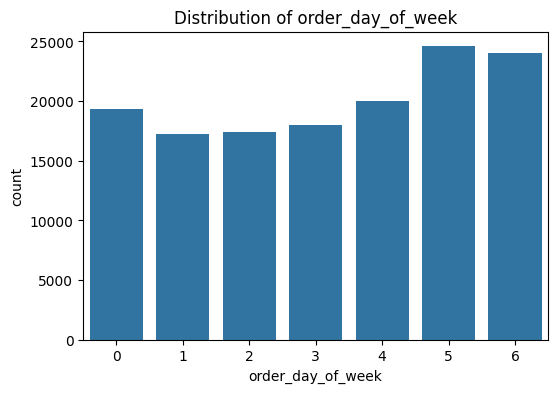

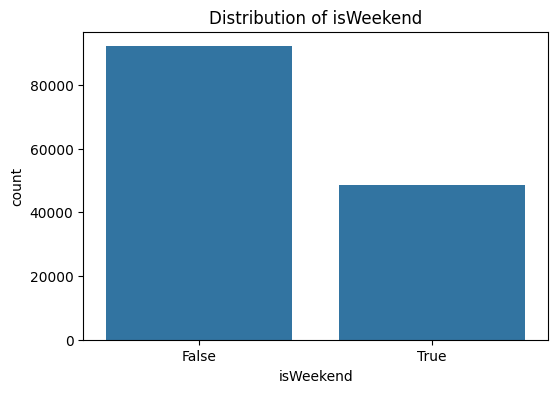

In [18]:
# Distribution of categorical columns
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=X_train, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=0)
    plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

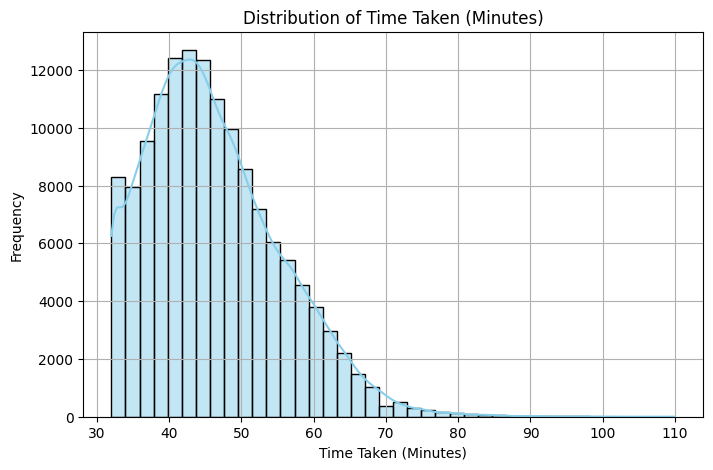

In [19]:
# Distribution of time_taken
plt.figure(figsize=(8, 5))
sns.histplot(y_train, bins=40, kde=True, color='skyblue')
plt.title("Distribution of Time Taken (Minutes)")
plt.xlabel("Time Taken (Minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

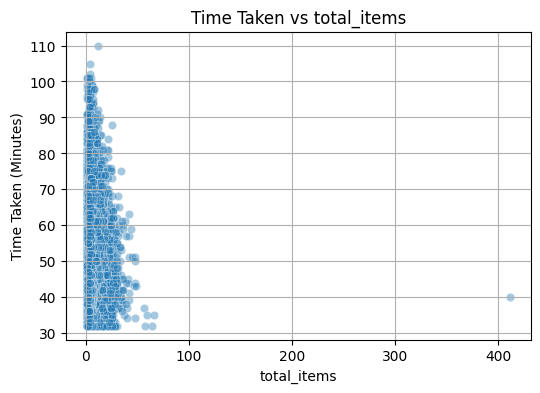

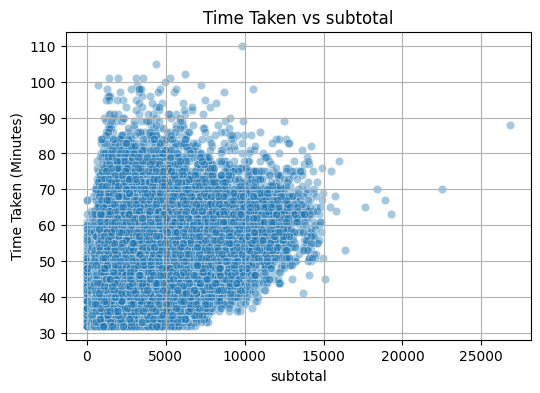

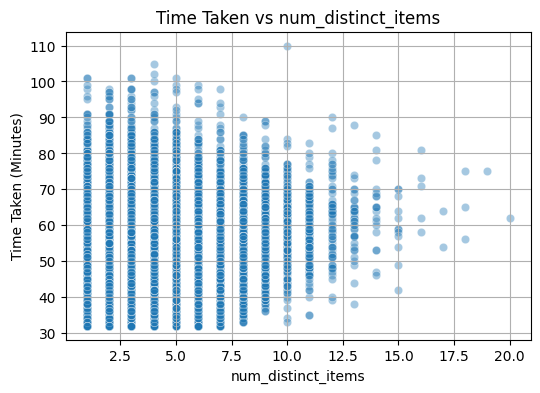

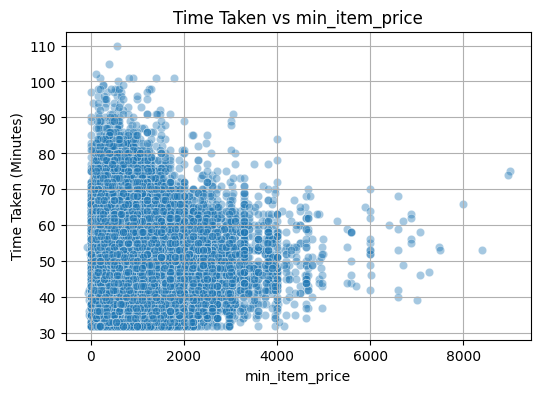

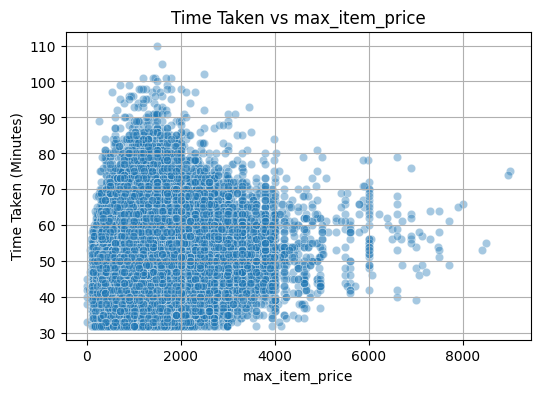

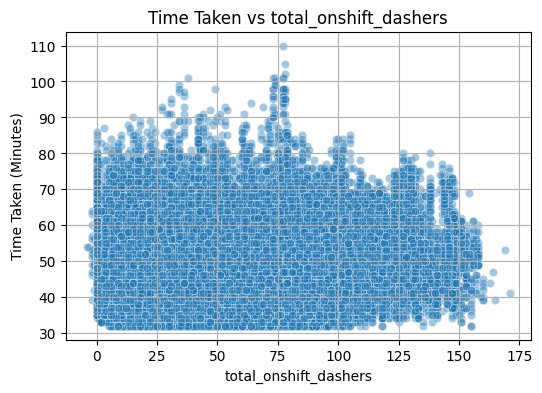

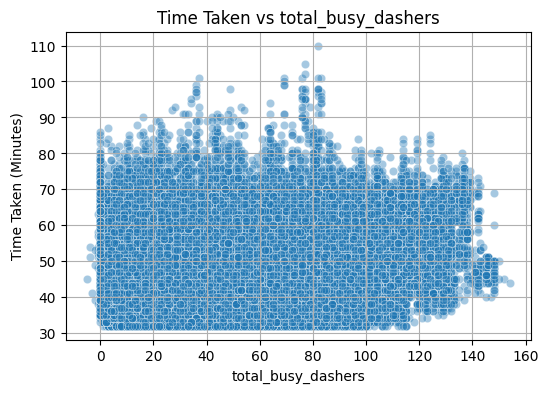

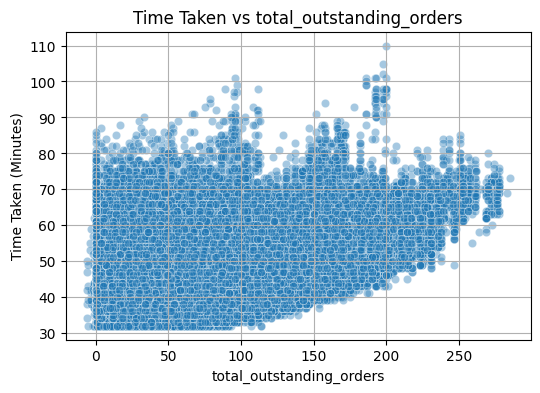

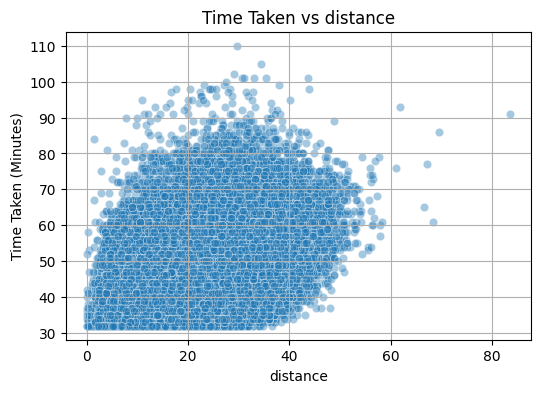

In [20]:
# Scatter plot to visualise the relationship between time_taken and other features
for col in numerical_column:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.4)
    plt.title(f"Time Taken vs {col}")
    plt.xlabel(col)
    plt.ylabel("Time Taken (Minutes)")
    plt.grid(True)
    plt.show()


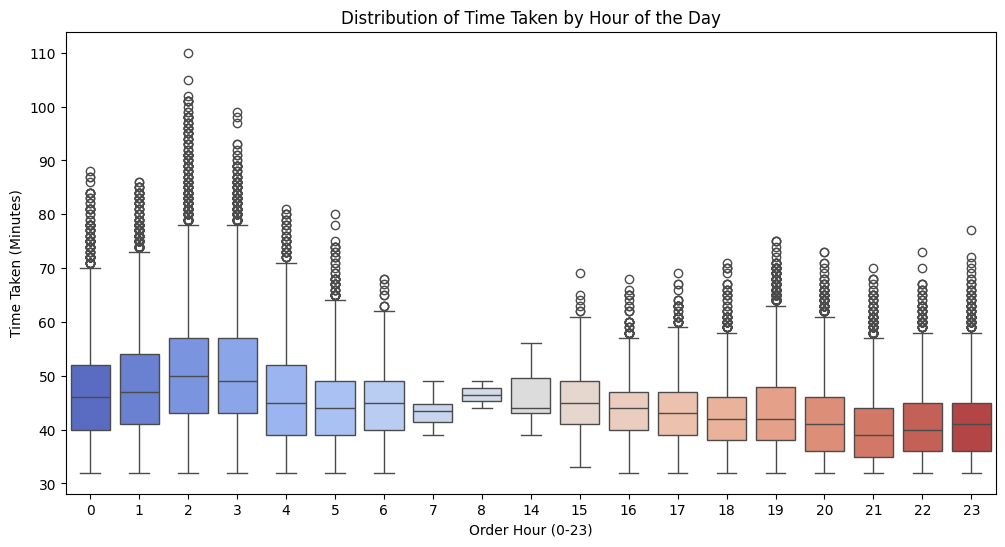

In [21]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(12, 6))
sns.boxplot(x=X_train['order_hour'], y=y_train, palette="coolwarm")
plt.title("Distribution of Time Taken by Hour of the Day")
plt.xlabel("Order Hour (0-23)")
plt.ylabel("Time Taken (Minutes)")
plt.show()

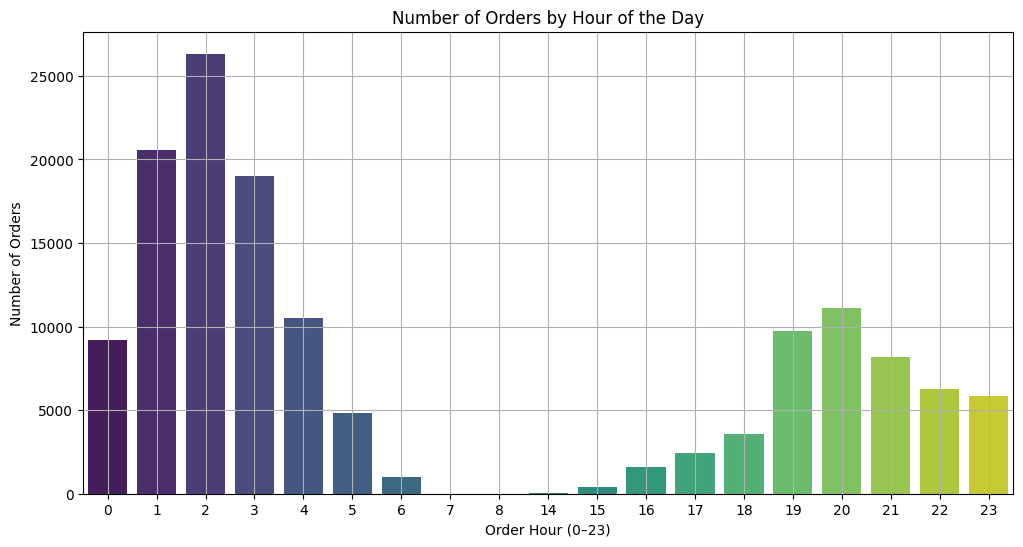

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x=X_train['order_hour'], palette='viridis')
plt.title("Number of Orders by Hour of the Day")
plt.xlabel("Order Hour (0–23)")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

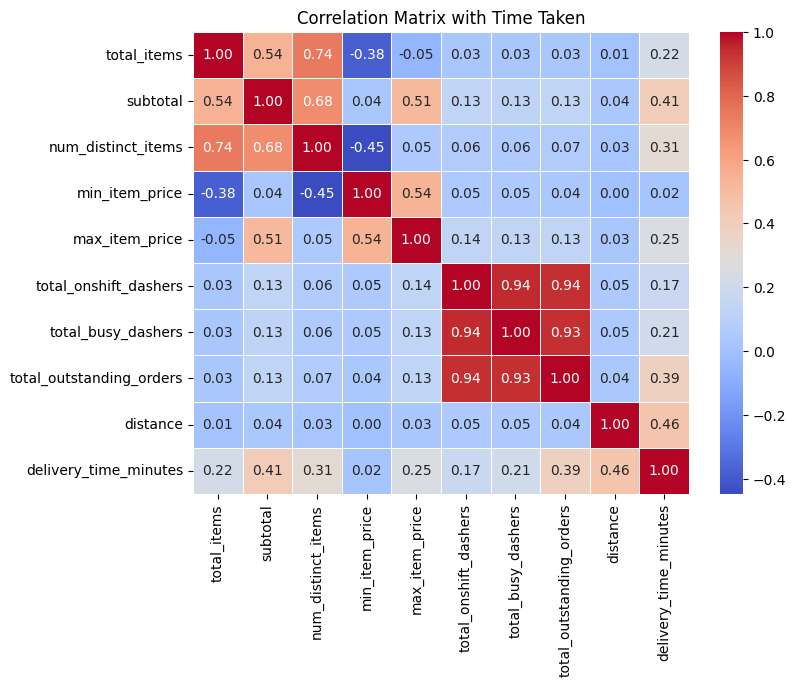

In [23]:
# Plot the heatmap of the correlation matrix
corr_df = X_train[numerical_column].copy()
corr_df['delivery_time_minutes'] = y_train

# computing correlation matrix
corr_matrix = corr_df.corr()

# Plotting the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix with Time Taken')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [24]:
# Drop 3-5 weakly correlated columns from training dataset
correlation_with_target = corr_matrix['delivery_time_minutes'].drop('delivery_time_minutes')
# finding the weak correaltion colums
weak_corr_features = correlation_with_target[correlation_with_target.abs() < 0.05].index.tolist()
print("Weakly correlated features to drop:", weak_corr_features)

# droping the weak features from training data
X_train_reduced = X_train.drop(columns=weak_corr_features[:5])

Weakly correlated features to drop: ['min_item_price']


In [25]:
X_train_reduced.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
102712       2.0                     45            2.0            1       820   
94576        4.0                     20            3.0            1       995   
49784        1.0                     36            3.0            4      2040   
37753        3.0                     39            1.0            2      2376   
91728        2.0                      6            1.0            1      1430   

        num_distinct_items  max_item_price  total_onshift_dashers  \
102712                   1             745                   35.0   
94576                    1             995                  110.0   
49784                    4             895                    6.0   
37753                    2            1399                   16.0   
91728                    1            1320                   64.0   

        total_busy_dashers  total_outstanding_orders  distance  order_hour  \
102712                39.0                      56.0     30.32          21   
94576                 72.0                     116.0     31.16           2   
49784                  3.0                       7.0     18.16          21   
37753                 17.0                      19.0     33.44           3   
91728                 47.0                      52.0     31.56          21   

        order_day_of_week order_day_name  isWeekend  
102712                  1        Tuesday      False  
94576                   4         Friday      False  
49784                   4         Friday      False  
37753                   1        Tuesday      False  
91728                   4         Friday      False

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

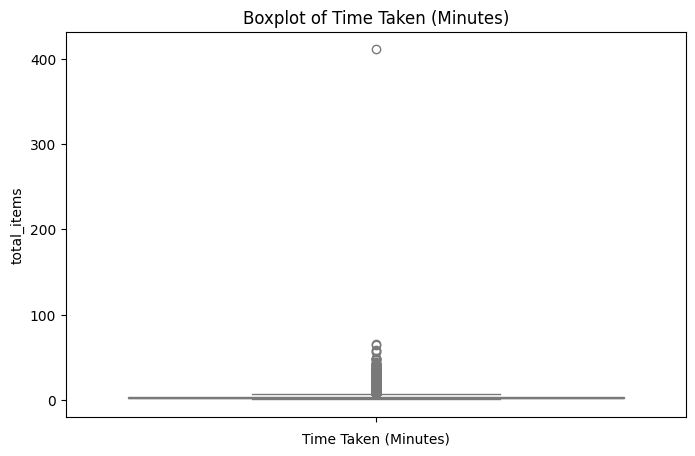

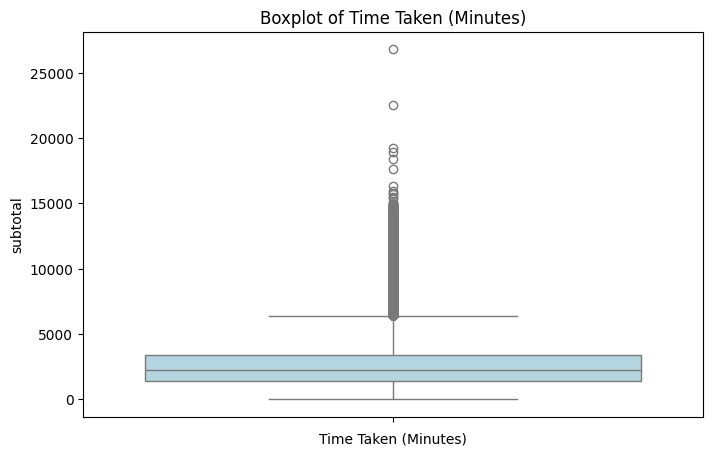

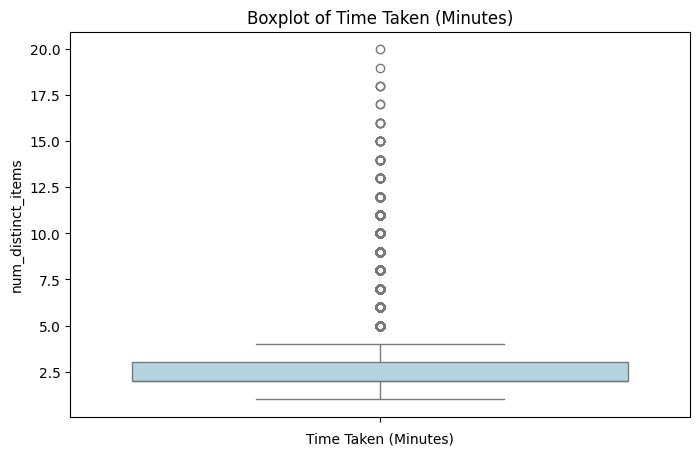

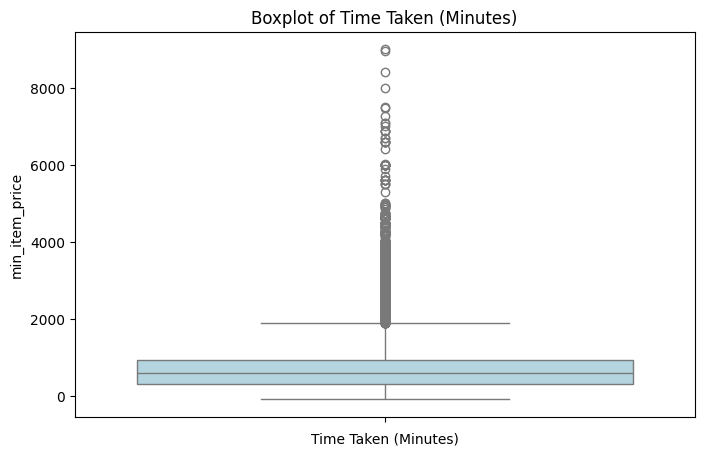

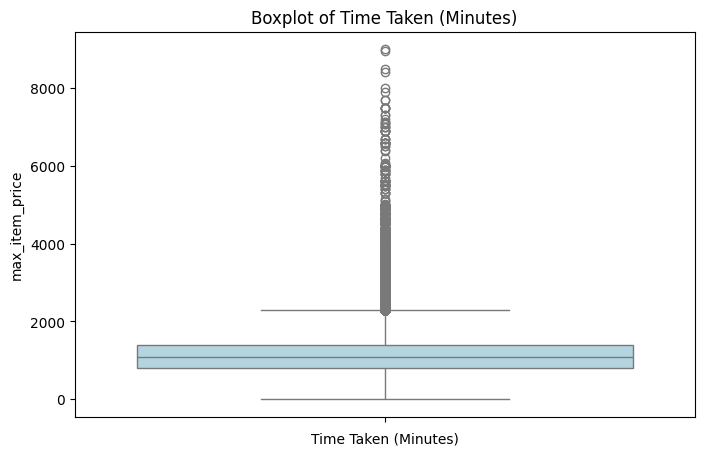

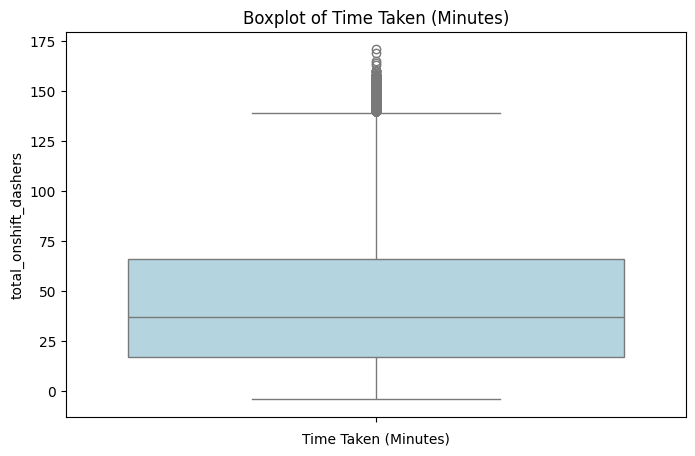

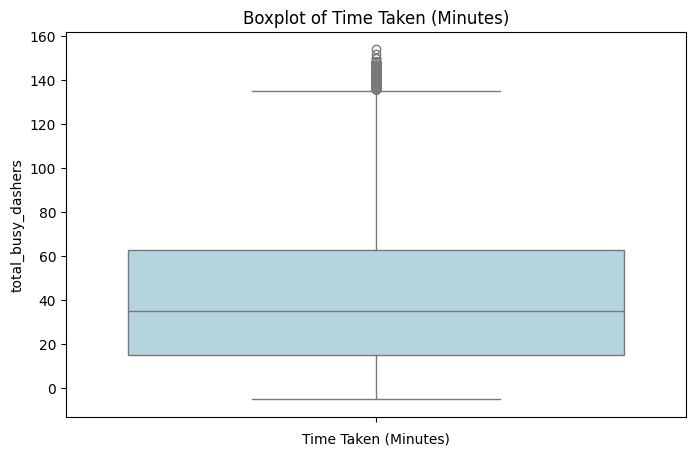

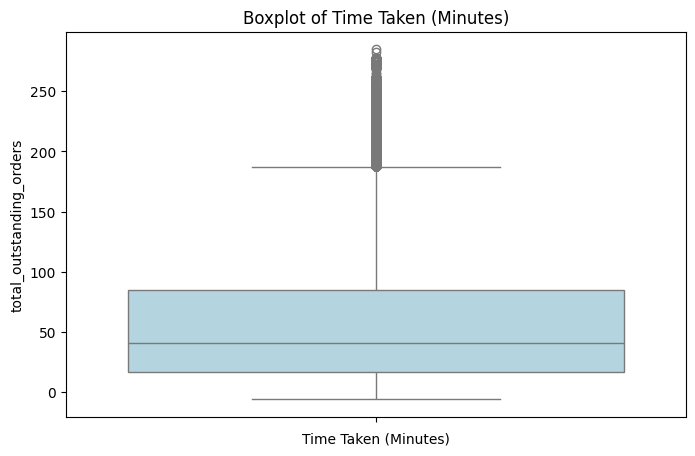

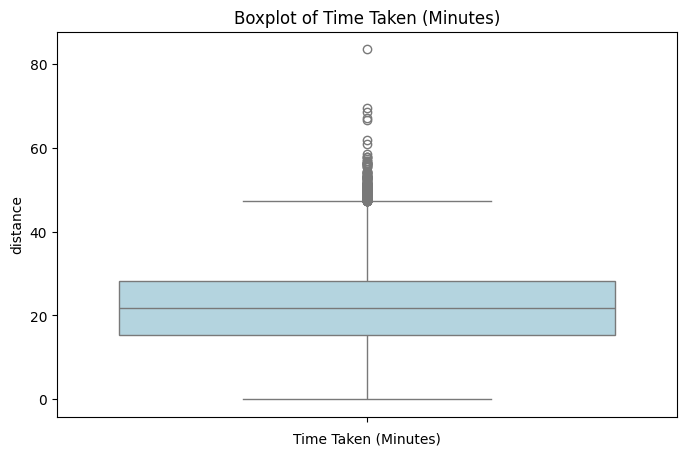

In [26]:
# Boxplot for time_taken
for cols in numerical_column:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=X_train[cols], color='lightblue')
    plt.title("Boxplot of Time Taken (Minutes)")
    plt.xlabel("Time Taken (Minutes)")
    plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [27]:
# Handle outliers
# Combining X_train and y_train for easier outlier handling
train_df = X_train.copy()
train_df['delivery_time_minutes'] = y_train
# Getting the numerical columns
numerical_column = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Removing outliers using IQR
for col in numerical_column:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtering out the outliers
    train_df = train_df[(train_df[col] >= lower_bound) & (train_df[col] <= upper_bound)]

# Split data back into X_train and y_train
X_train_cleaned = train_df.drop(columns=['delivery_time_minutes'])
y_train_cleaned = train_df['delivery_time_minutes']

print(f"Cleaned training data shape: {X_train_cleaned.shape}")

Cleaned training data shape: (116043, 16)


After Handling the outliers: 


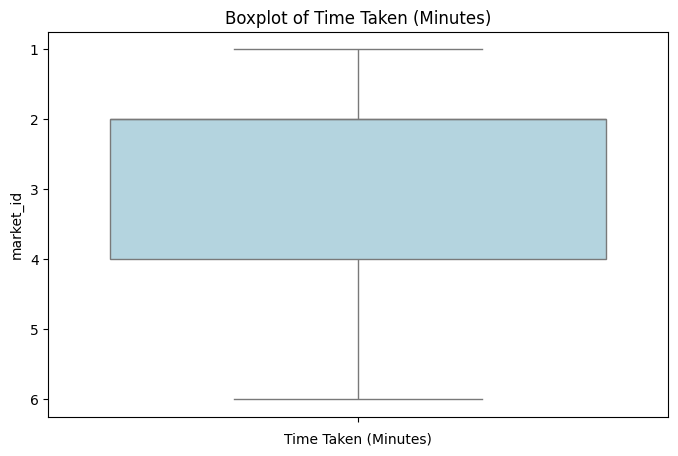

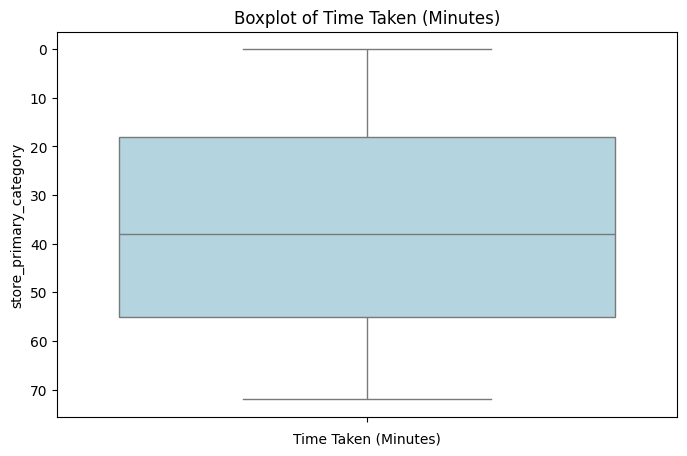

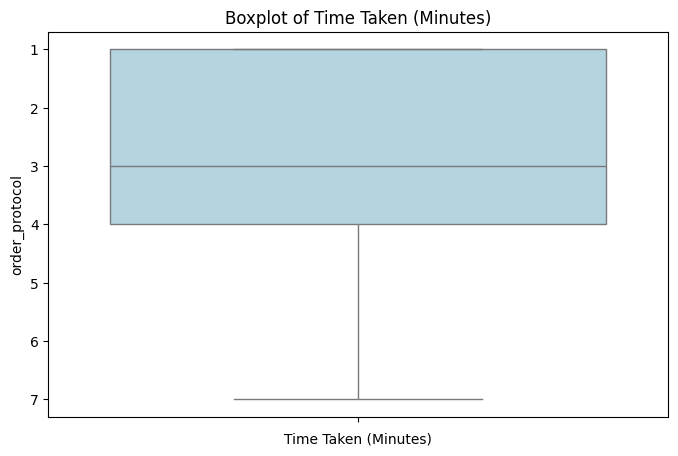

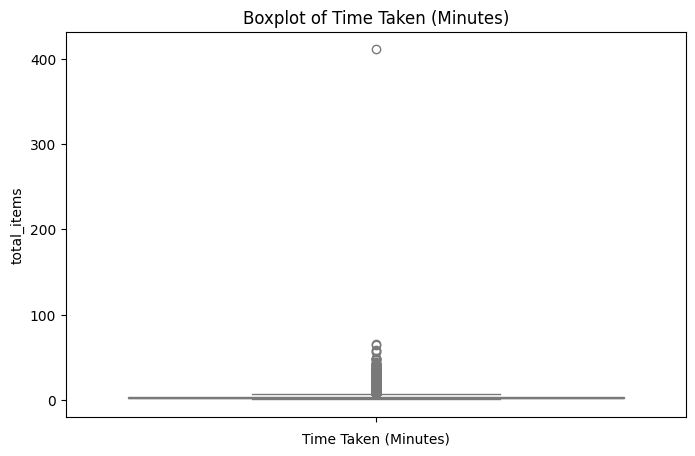

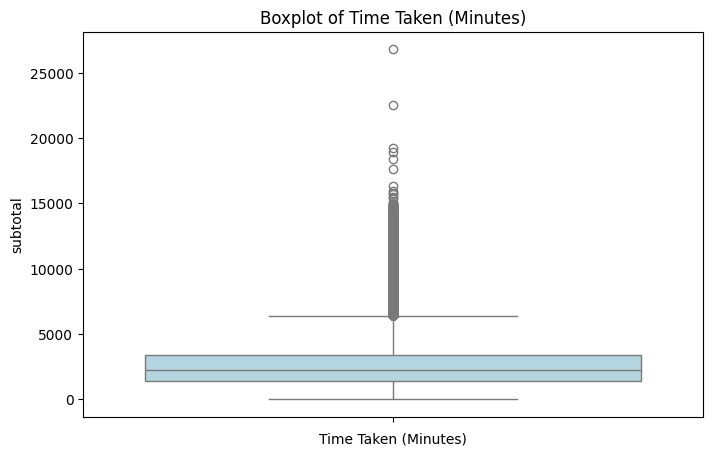

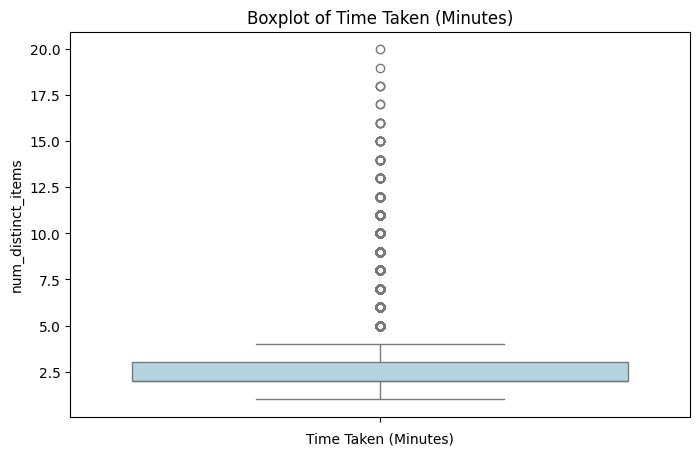

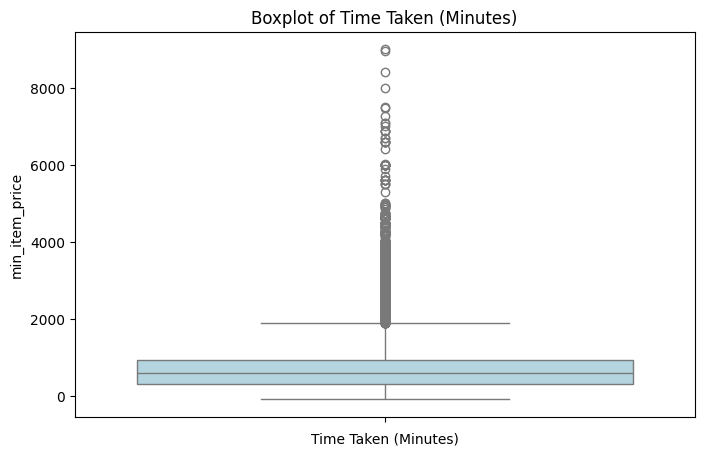

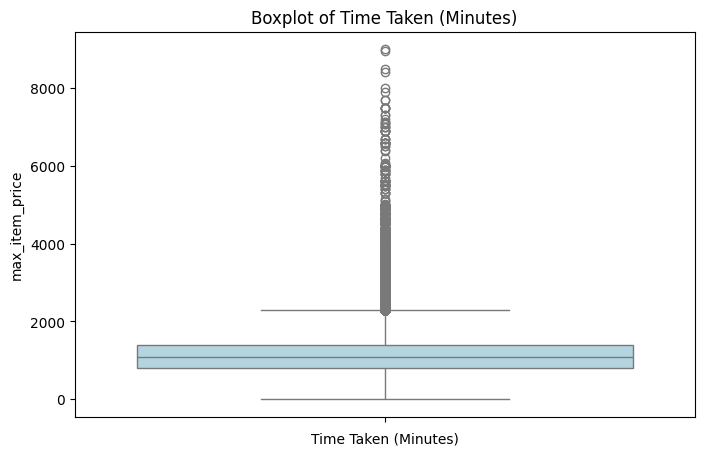

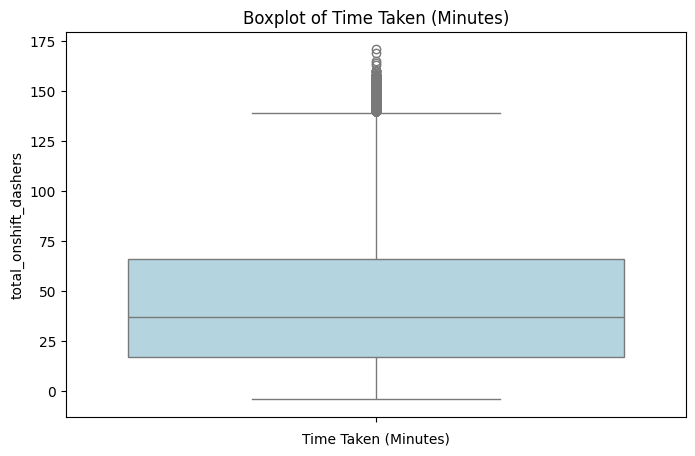

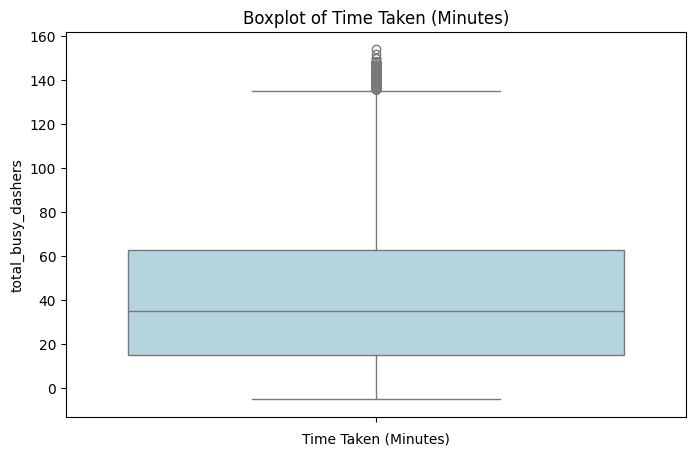

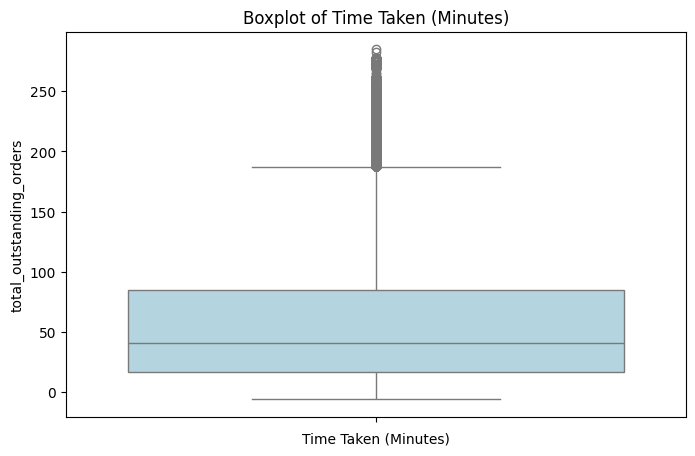

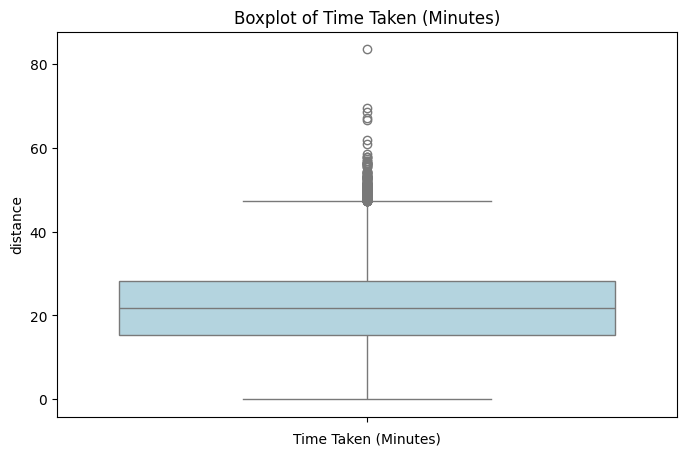

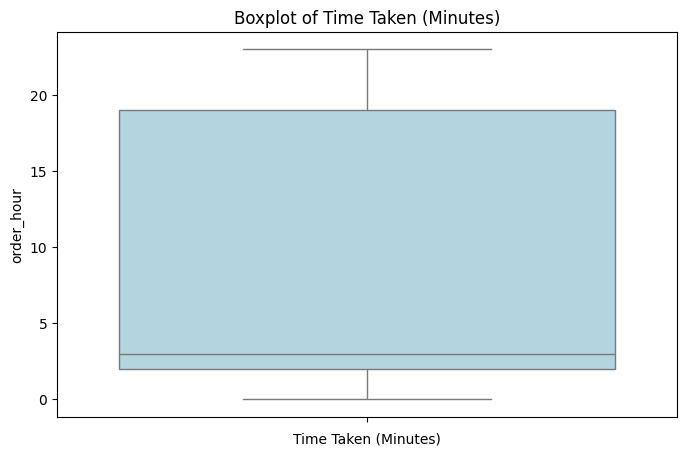

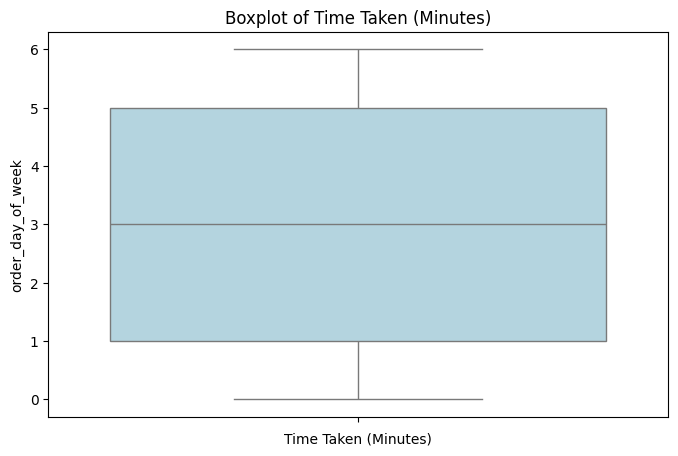

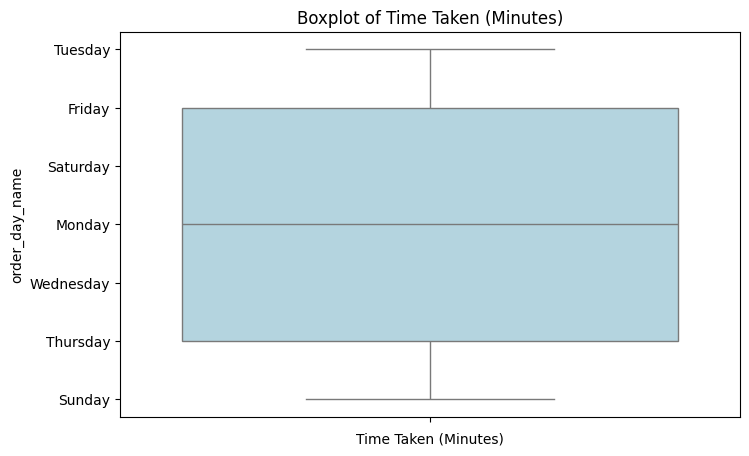

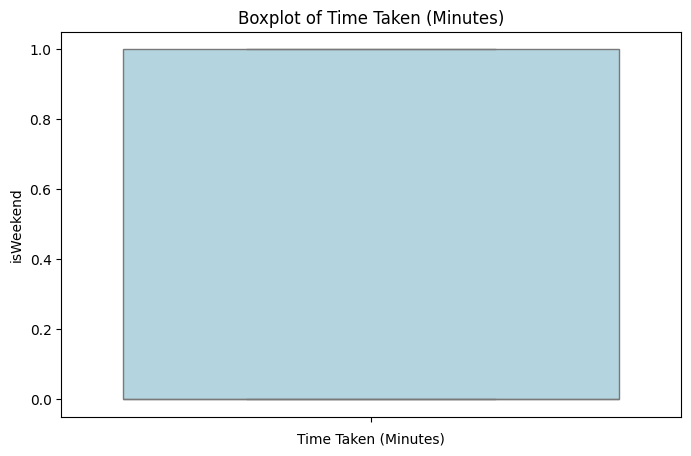

In [28]:
print("After Handling the outliers: ")
for cols in X_train_cleaned:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=X_train[cols], color='lightblue')
    plt.title("Boxplot of Time Taken (Minutes)")
    plt.xlabel("Time Taken (Minutes)")
    plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [29]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [30]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [31]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [32]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [33]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [34]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [43]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import scipy.stats as stats

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [40]:
numerical_column = [col for col in numerical_column if col in X_train.columns]

In [41]:
# Apply scaling to the numerical columns
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_column] = scaler.fit_transform(X_train[numerical_column])
X_test_scaled[numerical_column] = scaler.transform(X_test[numerical_column])

# Preview the scaled data
print(X_train_scaled.head())

       market_id store_primary_category order_protocol  total_items  subtotal  \
102712       2.0                     45            2.0    -0.809858 -1.026257   
94576        4.0                     20            3.0    -0.809858 -0.930670   
49784        1.0                     36            3.0     0.290202 -0.359882   
37753        3.0                     39            1.0    -0.443171 -0.176356   
91728        2.0                      6            1.0    -0.809858 -0.693069   

        num_distinct_items  min_item_price  max_item_price  \
102712           -1.031025        0.116889       -0.741388   
94576            -1.031025        0.598926       -0.294713   
49784             0.813974       -1.030360       -0.473383   
37753            -0.416025       -0.203184        0.427112   
91728            -1.031025        1.225575        0.285963   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
102712              -0.287165           -0.089448            

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [48]:
categorical_columns = X_train.select_dtypes(include='object').columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

# One-hot encode categorical columns
ohe = OneHotEncoder(drop='first', sparse_output=False)
X_categorical_encoded = pd.DataFrame(ohe.fit_transform(X_train[categorical_columns]), columns=ohe.get_feature_names_out(categorical_columns))

# Combine with numeric columns
X_num = X_train[numerical_columns].reset_index(drop=True)
X_combined = pd.concat([X_num, X_categorical_encoded], axis=1)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_combined)

In [46]:
# Create/Initialise the model
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_train_scaled,y_train)

# Coefficients
print("Coefficient:", linear_model.coef_)
print("Intercept:", linear_model.intercept_)

Coefficient: [ -0.16217923   2.40889712   1.09590728   0.11337572   0.66357628
 -11.80095038  -5.0255626   18.5966079    4.17711012   0.49492022
   0.12122111   0.46476888  -0.24523543  -0.37304669  -0.41874754]
Intercept: 46.198071411809046


In [52]:
# Make predictions
# Transform X_test using the same encoder and scaler used on X_train
X_test_cat_encoded = pd.DataFrame(ohe.transform(X_test[categorical_columns]), columns=ohe.get_feature_names_out(categorical_columns))
X_test_num = X_test[numerical_columns].reset_index(drop=True)
X_test_combined = pd.concat([X_test_num, X_test_cat_encoded], axis=1)

# Scale X_test using the same scaler
X_test_scaled = scaler.transform(X_test_combined)

# Predict using trained model
y_pred = linear_model.predict(X_test_scaled)

# Displaying predictions vs actual values
predict_vs_actual = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

print(predict_vs_actual)

       Actual  Predicted
0        50.0  46.214825
1        69.0  67.948386
2        41.0  39.991361
3        45.0  46.143402
4        40.0  43.888084
...       ...        ...
35151    57.0  55.387529
35152    35.0  38.031345
35153    32.0  30.436997
35154    36.0  38.522796
35155    43.0  41.845442

[35156 rows x 2 columns]


In [50]:
# Find results for evaluation metrics
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

# Print results
print("Evaluation Metrics:-")
print(f"R² Score  : {r2:.4f}")
print(f"MAE       : {MAE:.4f}")
print(f"MSE       : {MSE:.4f}")
print(f"RMSE      : {RMSE:.4f}")


Evaluation Metrics:-
R² Score  : 0.8235
MAE       : 3.0056
MSE       : 15.4459
RMSE      : 3.9301


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [54]:
# Loop through the number of features and test the model
# Converting X_train_scaled back to DataFrame using original column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_combined.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_combined.columns)

best_score = -1
best_num_features = 0
best_features = None

print("RFE Feature Selection Results:")
for n in range(5, len(X_train_scaled_df.columns) + 1):
    rfe = RFE(LinearRegression(), n_features_to_select=n)
    rfe.fit(X_train_scaled_df, y_train)

    # Get selected features
    selected = X_train_scaled_df.columns[rfe.support_]

    # Train model on selected features
    linear_model.fit(X_train_scaled_df[selected], y_train)
    y_pred = linear_model.predict(X_test_scaled_df[selected])
    score = r2_score(y_test, y_pred)
    
    print(f"Top {n} features => R² Score: {score:.4f}")

    # Save best score
    if score > best_score:
        best_score = score
        best_num_features = n
        best_features = selected

# Final model with best features
print(f"\nBest number of features: {best_num_features}")
print("Selected features:", list(best_features))


RFE Feature Selection Results:
Top 5 features => R² Score: 0.8069
Top 6 features => R² Score: 0.8084
Top 7 features => R² Score: 0.8123
Top 8 features => R² Score: 0.8156
Top 9 features => R² Score: 0.8201
Top 10 features => R² Score: 0.8212
Top 11 features => R² Score: 0.8225
Top 12 features => R² Score: 0.8232
Top 13 features => R² Score: 0.8233
Top 14 features => R² Score: 0.8234
Top 15 features => R² Score: 0.8235

Best number of features: 15
Selected features: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_day_name_Monday', 'order_day_name_Saturday', 'order_day_name_Sunday', 'order_day_name_Thursday', 'order_day_name_Tuesday', 'order_day_name_Wednesday']


In [56]:
# Build the final model with selected number of features
# Convert scaled arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_combined.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_combined.columns)

# Build the final model using best features
final_model = LinearRegression()
final_model.fit(X_train_scaled_df[best_features], y_train)

# Predict
final_predictions = final_model.predict(X_test_scaled_df[best_features])

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("\nFinal Model Evaluation:")
print("MAE:", mean_absolute_error(y_test, final_predictions))
print("MSE:", mean_squared_error(y_test, final_predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, final_predictions)))
print("R² Score:", r2_score(y_test, final_predictions))


Final Model Evaluation:
MAE: 3.0056403678377976
MSE: 15.445852828074223
RMSE: 3.930121223076233
R² Score: 0.8235309938950275


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

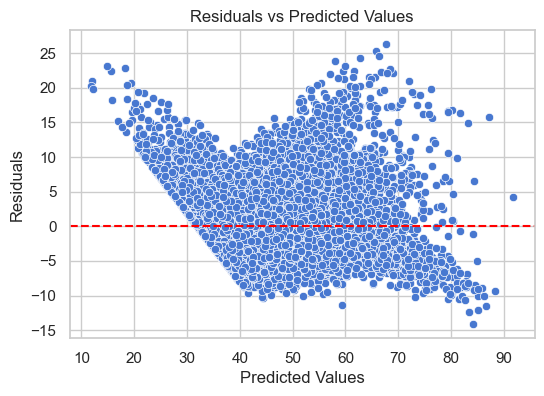

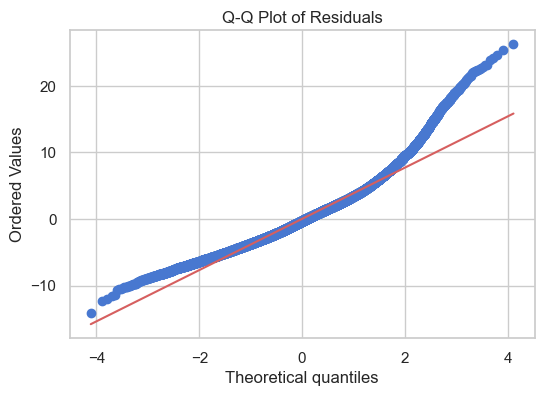

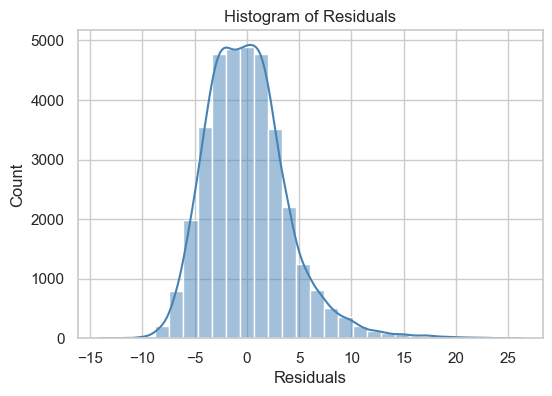

In [57]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
# Compute the residuals
# Calculate residuals
residuals = y_test - final_predictions

# Setting up seaborn theme
sns.set(style="whitegrid", palette="muted")

# Residuals vs Predicted Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=final_predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Q-Q Plot
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# 3. Histogram of Residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30, color='steelblue')
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

[Your inferences here:]

The residuals follow a normal distribution with a mean close to zero, indicating that Model 1 is a good fit for the data.

> 1. Residuals vs. Predicted Values

>The residuals appear to be randomly dispersed around zero without any noticeable pattern, indicating that the model fits the data well.

> 2. Q-Q Plot

>The residuals closely align with the diagonal line, suggesting that they follow a normal distribution—another sign of a well-fitting model.

> 3. Histogram of Residuals

>The residuals form a bell-shaped curve, confirming that they are approximately normally distributed, which supports the model's validity.

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [64]:
# Identify categorical and numerical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

# One-hot encode categorical columns
ohe = OneHotEncoder(drop='first', sparse_output=False)  # use sparse_output=False if sklearn >=1.2
X_categorical_encoded = pd.DataFrame(
    ohe.fit_transform(X_train[categorical_columns]),
    columns=ohe.get_feature_names_out(categorical_columns),
    index=X_train.index  # maintain alignment
)

# Combine with numeric columns
X_train_encoded_df = pd.concat([X_train[numerical_columns], X_categorical_encoded], axis=1)

In [65]:
# Compare the scaled vs unscaled features used in the final model
# Get feature names used in the final model
selected_features = list(best_features)

# Get coefficients from the scaled model
scaled_coefficients = final_model.coef_

# Create a DataFrame for comparison
coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Scaled Coefficient': scaled_coefficients
})

# Retrain model on **unscaled but encoded** data
unscaled_model = LinearRegression()
unscaled_model.fit(X_train_encoded_df[selected_features], y_train)

# Add unscaled coefficients
coef_df['Unscaled Coefficient'] = unscaled_model.coef_

# Sort by absolute impact
coef_df['|Scaled|'] = coef_df['Scaled Coefficient'].abs()
coef_df.sort_values(by='|Scaled|', ascending=False, inplace=True)

# Results
print("Coefficient Analysis (Scaled vs Unscaled):")
print(coef_df[['Feature', 'Scaled Coefficient', 'Unscaled Coefficient']])

Coefficient Analysis (Scaled vs Unscaled):
                     Feature  Scaled Coefficient  Unscaled Coefficient
7   total_outstanding_orders           18.596608              0.352386
5      total_onshift_dashers          -11.800950             -0.341341
6         total_busy_dashers           -5.025563             -0.156085
8                   distance            4.177110              0.477323
1                   subtotal            2.408897              0.001316
2         num_distinct_items            1.095907              0.673983
4             max_item_price            0.663576              0.001186
9      order_day_name_Monday            0.494920              1.436327
11     order_day_name_Sunday            0.464769              1.235523
14  order_day_name_Wednesday           -0.418748             -1.270637
13    order_day_name_Tuesday           -0.373047             -1.137391
12   order_day_name_Thursday           -0.245235             -0.733858
0                total_items      

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [66]:
# Analyze the effect of a unit change in a feature, say 'total_items'
feature_name = 'total_items'

if feature_name in selected_features:
    coef = unscaled_model.coef_[selected_features.index(feature_name)]
    print(f"Effect of 1 unit increase in '{feature_name}':")
    print(f"For each additional item in the order, delivery time increases by approximately {coef:.4f} minutes.")
else:
    print(f"Feature '{feature_name}' was not selected in the final model.")

Effect of 1 unit increase in 'total_items':
For each additional item in the order, delivery time increases by approximately -0.0595 minutes.


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> YYes, there are few Categorical Variable in the data. That are-
> 
> **market_id** - This feature has a very low correlation with delivery time.
>
> **store_primary_category** - This is the type of restaurant such as fast food, dine-in etc. Restaurant type will have no impact on delivery time.
> 
> **order_protocol** - Some protocols like manual confirmation (for example, orders over the phone) may lengthen order processing time and thereby delivery time as well. Automatic order placement processes (through an app) may be quicker.
> 
> **isWeekend** - Weekend orders may take longer time because of increased demand, traffic, or restaurant load.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> The parameter test_size = 0.2 in the train_test_split() function means that 20% of the total dataset is allocated for the test set, and the remaining 80% is used for training the model.

>This helps in evaluating the model's performance on unseen data and checking how well it generalizes.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Based on the heatmap, the variable distance shows the highest positive correlation (0.46) with the target variable delivery_time_minutes. This indicates that as the delivery distance increases, the delivery time tends to increase as well.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> To detect outliers, I used the Interquartile Range (IQR) method. This involves calculating the 25th percentile (Q1) and the 75th percentile (Q3) for each numerical feature, and then identifying data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR as outliers.

> After detecting the outlier, I removed the outliers from the dataset to prevent them from skewing the model's performance and affecting the accuracy of predictions. This helped in ensuring that the model was trained on clean and reliable data.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> Based on the final model and coefficient analysis, the top 3 features that significantly affect delivery time are:

>> **distance** – This has the strongest positive impact; as distance increases, delivery time also increases.

>> **total_busy_dashers** – A higher number of busy dashers indicates more demand, potentially delaying deliveries.

>> **total_outstanding_orders** – More pending orders can lead to longer wait times, increasing delivery duration.

>These features had the highest scaled coefficients, indicating their strong influence on the target variable.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> ### Linear Regression Overview

| **Aspect**                | **Details** |
|---------------------------|-------------|
| **Definition**            | Linear Regression is a supervised learning algorithm used to predict a continuous target variable based on one or more independent variables. It finds the best-fit line to minimize prediction error. |

### Types of Linear Regression

| **Type**                  | **Description** |
|---------------------------|-----------------|
| **Simple Linear Regression**   | Uses one independent variable and one dependent variable to model the relationship with a straight line. |
| **Multiple Linear Regression** | Uses multiple independent variables to predict a single dependent variable, capturing more complex relationships. |

### Working of Linear Regression

| **Step**                  | **Explanation** |
|---------------------------|-----------------|
| **Modeling Relationship** | Assumes a linear relationship between independent (X) and dependent (Y) variables. A straight line represents this relationship. |
| **Cost Function**         | Measures error using Mean Squared Error (MSE): $MSE = \\frac{1}{n} \\sum_{i=1}^{n} (y_i - \\hat{y}_i)^2$ |
| **Optimization**          | Minimizes the MSE using optimization techniques like:<br>- **Gradient Descent**: Iteratively adjusts coefficients.<br>- **Ordinary Least Squares (OLS)**: Analytically computes coefficients. |

### Model Evaluation Metrics

| **Metric**                | **Purpose** |
|---------------------------|-------------|
| **MAE** (Mean Absolute Error) | Average of absolute differences between predicted and actual values. |
| **MSE** (Mean Squared Error) | Squares errors to penalize larger deviations. |
| **RMSE** (Root MSE)           | Square root of MSE for interpretable error scale. |
| **R² Score**                  | Explains proportion of variance in target variable captured by the model. |




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
> The difference between Simple Linear Regression and Multiple Linear Regression:</span>

| Feature                              | Simple Linear Regression                             | Multiple Linear Regression                           |
|--------------------------------------|------------------------------------------------------|------------------------------------------------------|
| **Definition**                       | relationship between one independent variable and    | relationship between multiple independent variables  |
|                                      | one dependent variable.                              | and one dependent variable.                          |
| **Equation**                         | $Y=b_0 + b_1X_1$                                     | $Y=b_0+b_1X_1+b_2X_2+...+b_nX_n$                     |
| **Number of Independent Variables**  | Only one independent variable (predictor).           | Two or more independent variables (predictors).      |
| **Complexity**                       | Simple to understand and interpret.                  | More complex due to multiple predictors.             |
| **Visualization**                    | Can be represented on a 2D graph (straight line).    | Cannot be visualized easily beyond 3D (higher-       |
|                                      |                                                      | dimensional space).                                  |
| **Use Case**                         | Used when there is only one influencing factor.      | Used when multiple factors influence the dependent   |
|                                      |                                                      | variable.                                            |
| **Example**                          | Predicting sales based on marketing spend on TV.     | Predicting house price based on area, location and   |
|                                      |                                                      | number of rooms.                                     |



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
> Cost Function in Linear Regression

| **Aspect**                        | **Description** |
|----------------------------------|-----------------|
| **Purpose**                      | Measures how well the model’s predictions match the actual outcomes. |
| **Commonly Used Cost Function** | Mean Squared Error (MSE) |
| **Formula**                      | $MSE = \\frac{1}{n} \\sum_{i=1}^{n} (y_i - \\hat{y}_i)^2$ |
| **Where:**                       | - $y_i$ = Actual value<br>- $\\hat{y}_i$ = Predicted value<br>- $n$ = Total number of observations |
| **Goal**                         | Minimize the MSE to improve prediction accuracy. |
| **Optimization Techniques**      | - **Gradient Descent**: Iteratively adjusts coefficients to minimize cost.<br>- **Ordinary Least Squares (OLS)**: Analytically computes optimal coefficients. |
| **Interpretation**               | Lower MSE = Better model fit |




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

> The difference between overfitting and underfitting:

| **Particulars** | **Overfitting** | **Underfitting** |
|-----------------|-----------------|------------------|
| **1. Data/Duration** | Performs well on training data but poorly on new/unseen data.<br>Requires regularization and tuning to prevent overfitting. | Performs poorly on both training and test data.<br>Needs more training time and larger dataset to improve. |
| **2. Variance** | High variance | Low variance |
| **3. Bias** | Low bias | High bias |
| **4. Complexity** | Model is very complex; needs to be simplified. | Model is too simple; needs more complexity to capture data patterns. |
| **5. Spotting** | Harder to detect as it fits training data very well. | Easier to detect due to poor performance on training data. |





---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**

Role of Residual Plot in Linear Regression

A **residual plot** is a graphical tool used to evaluate how well a linear regression model fits the data. It plots the **residuals (prediction errors)** on the Y-axis against the **predicted values** on the X-axis. Analyzing this plot helps validate the assumptions of linear regression.

> **Key Assumptions Checked Using a Residual Plot:**

> - **Random Distribution of Residuals Around Zero**  
   Residuals should appear randomly dispersed along the zero line. If any visible pattern or curve exists, it might indicate a **non-linear relationship**, suggesting that linear regression may not be the right model.

> - **Check for Constant Variance (Homoscedasticity)**  
   The spread of residuals should remain constant across all predicted values. A funnel-shaped or uneven spread signifies **heteroscedasticity**, which violates the assumption of equal variance.

> - **No Autocorrelation Among Residuals**  
   The residuals should not show any systematic pattern or sequence. If they exhibit cyclical or structured behavior, it may imply **autocorrelation** among observations.

> - **Identification of Outliers**  
   Any extremely large residuals can be spotted as outliers. These points may distort the model and affect its predictive performance.

A well-behaved residual plot (random, evenly spread, no patterns) supports that the linear regression model is appropriate.
